# Importing libraries

In [496]:
import nltk
import matplotlib.pyplot as plt
import random
import numpy as np
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer 
from nltk.corpus import stopwords
import re
import string
import pandas as pd
from nltk.stem import wordnet
from nltk.stem import WordNetLemmatizer
word_lem = WordNetLemmatizer()

# Reading and Visualizing Data

In [497]:
train_set = pd.read_csv('train.csv')

In [498]:
train_set.head(10)

,index,sentiment,tweet
0,1083042,4,"@BLeigh1130 I got the Ricky survey finished, b..."
1,1400552,4,@raliii Welll when you have to again i'm sure ...
2,170002,0,Migraining today--the naproxen sodium tablets ...
3,1146244,4,@Kelliekclark1 me too...I hope he feels the sa...
4,1496286,4,Shrimp again it must be very good yamm. I was...
5,171367,0,meeting just in time that iï¿½m trying to win ...
6,1467509,4,Shavua Tov. Happy beginning of the week. Nice ...
7,456607,0,I always feel like a bad person when I throw a...
8,1073070,4,@taurenlegend Wasn't able to DM u for some odd...
9,1289294,4,Two More Days Until Summer


In [499]:
train_set['index_new'] = range(0, len(train_set))

In [500]:
train_set.head(10)

,index,sentiment,tweet,index_new
0,1083042,4,"@BLeigh1130 I got the Ricky survey finished, b...",0
1,1400552,4,@raliii Welll when you have to again i'm sure ...,1
2,170002,0,Migraining today--the naproxen sodium tablets ...,2
3,1146244,4,@Kelliekclark1 me too...I hope he feels the sa...,3
4,1496286,4,Shrimp again it must be very good yamm. I was...,4
5,171367,0,meeting just in time that iï¿½m trying to win ...,5
6,1467509,4,Shavua Tov. Happy beginning of the week. Nice ...,6
7,456607,0,I always feel like a bad person when I throw a...,7
8,1073070,4,@taurenlegend Wasn't able to DM u for some odd...,8
9,1289294,4,Two More Days Until Summer,9


## Separating positive and negative tweets

In [501]:
positive_train_list = []
negative_train_list = []
for idx, sent in zip(train_set['index_new'], train_set['sentiment']):
    if sent == 4:
        positive_train_list.append(train_set['tweet'][idx])
    else:
        negative_train_list.append(train_set['tweet'][idx])

In [502]:
len_of_train_set = len(train_set)
len_of_positive_train = len(positive_train_list)
len_of_negative_train = len(negative_train_list)
print(len_of_train_set, len_of_positive_train, len_of_negative_train)
if (len_of_train_set == (len_of_positive_train + len_of_negative_train)):
    print("True")

1440000 720131 719869
True


## Checking random positve and negative tweet

In [662]:
print(positive_list[random.randint(0, len_of_positive_train)])

print(negative_list[random.randint(0, len_of_negative_train)])

@Jonasbrothers i hope it would arrive sooner here in the philippines! 
has a headache.    MTV Movie Awards tonight. :]


## to check the skewness of the train data

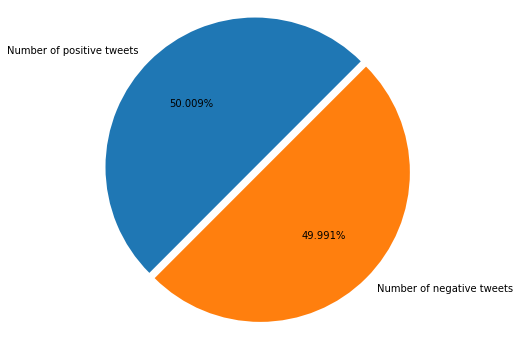

In [505]:

fig = plt.figure(figsize=(6, 6))

labels = 'Number of positive tweets', 'Number of negative tweets'

data_size = [len_of_positive_train, len_of_negative_train] 
gap = (0, 0.05)
plt.pie(data_size, explode=gap, labels=labels, autopct='%1.3f%%',
        shadow=False, startangle=45)


plt.axis('equal')  

plt.show()


### The plot shows that our data is almost uniformly distributed for positve and negative tweets.

## Creating list of labels for positive and negative classes

In [506]:
positive_train_label = []
for x in range(0, len_of_positive_train):
    positive_train_label.append(1)

In [507]:
negative_train_label = []
for x in range(0, len_of_negative_train):
    negative_train_label.append(0)

# Preprocessing Tweets

In [508]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hassa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hassa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\hassa\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [509]:
def pre_processing_tweets(tweet_list):
    Eng_stopwords = stopwords.words('english')
    positive_tweets_clean = []
    for twt2 in tweet_list:
        # twt2 = 'RT @232fhhdfh23 https://www.google.com dd DD'
        # removing any external links/URLS
        remove1 = re.compile(r'https?://[^\s\n\r]+')
        substituted_Str1 = remove1.sub(r'', twt2)

        # Removing one or more Re_tweets (along with one space)
        remove2 = re.compile(r'^RT[\s]+')
        substituted_Str2 = remove2.sub(r'', substituted_Str1)

        # tweet2 = re.sub(r'#', '', tweet2)
        remove3 = re.compile(r'#')
        substituted_Str3 = remove3.sub(r'', substituted_Str2)

        remove4 = re.compile(r'@[a-zA-Z0-9]+')
        substituted_Str4 = remove4.sub(r'', substituted_Str3)

        remove5 = re.compile(r'i\'m')
        var = 'I\'m'
        substituted_Str5 = remove5.sub(var, substituted_Str4)
        
        remove6 = re.compile(r'[...]')
        substituted_Str6 = remove5.sub(r'', substituted_Str5)
    
        positive_tweets_clean.append(substituted_Str6)
        
    # Removing contractions
    positive_tweets_clean1 = []
    for text in positive_tweets_clean:
        expanded_words = []  
        for word in text.split():
          # using contractions.fix to expand the shotened words
          expanded_words.append(contractions.fix(word)) 

        expanded_text = ' '.join(expanded_words)
        #print('Original text: ' + text)
        #print('Expanded_text: ' + expanded_text)
        positive_tweets_clean1.append(expanded_text)
        
    # Tokenizing
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,reduce_len=True)
    positive_tweets_clean2 = []
    for twt3 in positive_tweets_clean1:
        tweet_tokens = tokenizer.tokenize(twt3)
        positive_tweets_clean2.append(tweet_tokens)
        
    # Removing stopwords and punctuations
    positive_tweets_clean3 = []
    for listt in positive_tweets_clean2:
        listt2 = []
        for word in listt:
            if (word not in Eng_stopwords and word not in string.punctuation):
                listt2.append(word)
        positive_tweets_clean3.append(listt2)
        
    # Lemmatizing the tweets
    tweets_lemmatized = [] 
    for twt4 in positive_tweets_clean3:
        listt3 = []
        for word2 in twt4:
            lemm_word = word_lem.lemmatize(word2)  # lemmatizing word
            listt3.append(lemm_word)
        tweets_lemmatized.append(listt3)  # append to the list
        
    return tweets_lemmatized

In [654]:
def pre_processing_tweets_single(tweet):
    Eng_stopwords = stopwords.words('english')
    positive_tweets_clean = []
    # twt2 = 'RT @232fhhdfh23 https://www.google.com dd DD'
    # removing any external links/URLS
    twt2 = tweet
    #print(twt2)
    remove1 = re.compile(r'https?://[^\s\n\r]+')
    substituted_Str1 = remove1.sub(r'', twt2)

    # Removing one or more Re_tweets (along with one space)
    remove2 = re.compile(r'^RT[\s]+')
    substituted_Str2 = remove2.sub(r'', substituted_Str1)

    # tweet2 = re.sub(r'#', '', tweet2)
    remove3 = re.compile(r'#')
    substituted_Str3 = remove3.sub(r'', substituted_Str2)

    remove4 = re.compile(r'@[a-zA-Z0-9]+')
    substituted_Str4 = remove4.sub(r'', substituted_Str3)

    remove5 = re.compile(r'i\'m')
    var = 'I\'m'
    substituted_Str5 = remove5.sub(var, substituted_Str4)

    remove6 = re.compile(r'[...]')
    substituted_Str6 = remove5.sub(r'', substituted_Str5)

    positive_tweets_clean.append(substituted_Str6)
        
    # Removing contractions
    positive_tweets_clean1 = []
    for text in positive_tweets_clean:
        expanded_words = []  
        #for word in text.split():
          # using contractions.fix to expand the shotened words
        expanded_words.append(contractions.fix(text)) 

    expanded_text = ' '.join(expanded_words)
    positive_tweets_clean1.append(expanded_text)
    # print(positive_tweets_clean1)
    # Tokenizing
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,reduce_len=True)
    positive_tweets_clean2 = []
    #for twt3 in positive_tweets_clean1:
    tweet_tokens = tokenizer.tokenize(twt2)
    positive_tweets_clean2.append(tweet_tokens)
    # print(positive_tweets_clean2)
    
    
    def flatten_list(_2d_list):
        flat_list = []
        # Iterate through the outer list
        for element in _2d_list:
            if type(element) is list:
                # If the element is of type list, iterate through the sublist
                for item in element:
                    flat_list.append(item)
            else:
                flat_list.append(element)
        return flat_list
    positive_tweets_clean2 = flatten_list(positive_tweets_clean2)
    
    
    # Removing stopwords and punctuations
    positive_tweets_clean3 = []
    for word in positive_tweets_clean2:
        #listt2 = []
        #for word in listt:
        if (word not in Eng_stopwords and word not in string.punctuation):
            positive_tweets_clean3.append(word)
    #positive_tweets_clean3.append(listt2)
        
    # Lemmatizing the tweets
    tweets_lemmatized = [] 
    for word2 in positive_tweets_clean3:
        #listt3 = []
        #for word2 in twt4:
        lemm_word = word_lem.lemmatize(word2)  # lemmatizing word
        tweets_lemmatized.append(lemm_word)
    #tweets_lemmatized.append(listt3)  # append to the list
        
    return tweets_lemmatized

In [655]:
pre_processing_tweets_single('hello hi sad happy')

['hello', 'hi', 'sad', 'happy']

In [510]:
positive_processed_tweets = pre_processing_tweets(positive_train_list)

In [512]:
negative_processed_tweets = pre_processing_tweets(negative_train_list)

In [558]:
# train_labels = positive_train_label + negative_train_label
train_labels = np.append(np.ones((len(positive_train_label), 1)), np.zeros((len(negative_train_label), 1)), axis=0)

In [559]:
train_labels[-10:-1]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [613]:
train_processed_tweets = positive_processed_tweets + negative_processed_tweets

In [518]:
def Word_frequency_counter(processed_tweets, all_labels):
   
    word_freq = {}
    for y, tweet in zip(all_labels, processed_tweets):
        for word in tweet:
            pair = (word, y)
            if pair in word_freq:
                word_freq[pair] += 1
            else:
                word_freq[pair] = 1    
    return word_freq

In [519]:
word_frequencies = Word_frequency_counter(train_processed_tweets, train_labels)

In [523]:
test_words = ['hello', 'happy', 'sad', 'only', 'sad', 'shit', 'are', 'okay', 'best', 'feel', 'ridiculous']
test_data = []

for word in test_words:
    positive_count = 0
    negative_count = 0
    if (word, 1) in word_frequencies:
        positive_count = word_frequencies[(word, 1)]
        
    if (word, 0) in word_frequencies:
        negative_count = word_frequencies[(word, 0)]
        
    test_data.append([word, positive_count, negative_count])
    
test_data

[['hello', 4067, 1013],
 ['happy', 18418, 5818],
 ['sad', 1369, 25016],
 ['only', 0, 0],
 ['sad', 1369, 25016],
 ['shit', 1906, 4793],
 ['are', 6, 5],
 ['okay', 3938, 3171],
 ['best', 10088, 4650],
 ['feel', 8996, 22818],
 ['ridiculous', 191, 354]]

In [525]:
def plot_positive_negative_words(test_data):
    fig, ax = plt.subplots(figsize = (10, 10))

    x = np.log([x_test[1] + 1 for x_test in test_data])
    y = np.log([x_test[2] + 1 for x_test in test_data]) 

    ax.scatter(x, y)  

    plt.xlabel("Log(positive_count)")
    plt.ylabel("Log(negative_count)")

    for i in range(0, len(test_data)):
        ax.annotate(test_data[i][0], (x[i], y[i]), fontsize=12)

    # plotting a line with slope = 1 because the data is uniformly distributed
    
    ax.plot([0, 10], [0, 10], color = 'green') 
    plt.show()


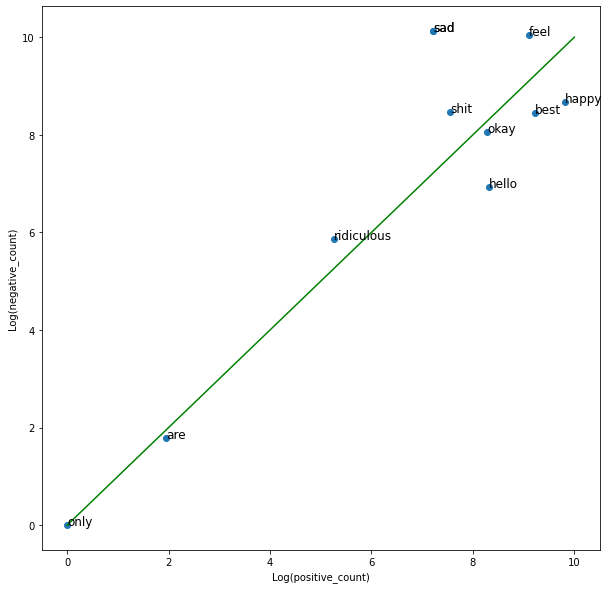

In [526]:
plot_positive_negative_words(test_data)

# Using Logistic Regression Classifier

In [527]:
def sigmoid(z): 
    h = 1/(1 + np.exp(-z))
    return h

In [673]:
def gradientDescent(x, y, theta, alpha, num_iterations):
   
    m = len(x)
    #print(m)
    for i in range(0, num_iterations):
        
        z = np.dot(x,theta)
        # z = np.expand_dims(z, axis=1)
        print('z shape',z.shape)
        h = sigmoid(z)
        print('h shape',h.shape)

        J = (-1/m)*(np.dot(y.T, np.log(h)) + np.dot((1-y).T, np.log(1-h)))

        theta = theta - (alpha/m) * (np.dot((x.T), (h-y)))
        #theta = theta - (alpha/m) * (np.dot((h-y).T, x))
        if i%100 == 0:
            print(f'loss after {i}th iterations', J)
        
    print(J)
    J = float(J)
    return J, theta

In [674]:
np.random.seed(1)
# X input is 10 x 3 with ones for the bias terms
tmp_X = np.append(np.ones((10, 1)), np.random.rand(10, 2) * 2000, axis=1)
# Y Labels are 10 x 1
tmp_Y = (np.random.rand(10, 1) > 0.35).astype(float)

# Apply gradient descent
tmp_J, tmp_theta = gradientDescent(tmp_X, tmp_Y, np.zeros((3, 1)), 1e-8, 700)
print(f"The cost after training is {tmp_J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(tmp_theta)]}")

z shape (10, 1)
h shape (10, 1)
loss after 0th iterations [[0.69314718]]
z shape (10, 1)
h shape (10, 1)
z shape (10, 1)
h shape (10, 1)
z shape (10, 1)
h shape (10, 1)
z shape (10, 1)
h shape (10, 1)
z shape (10, 1)
h shape (10, 1)
z shape (10, 1)
h shape (10, 1)
z shape (10, 1)
h shape (10, 1)
z shape (10, 1)
h shape (10, 1)
z shape (10, 1)
h shape (10, 1)
z shape (10, 1)
h shape (10, 1)
z shape (10, 1)
h shape (10, 1)
z shape (10, 1)
h shape (10, 1)
z shape (10, 1)
h shape (10, 1)
z shape (10, 1)
h shape (10, 1)
z shape (10, 1)
h shape (10, 1)
z shape (10, 1)
h shape (10, 1)
z shape (10, 1)
h shape (10, 1)
z shape (10, 1)
h shape (10, 1)
z shape (10, 1)
h shape (10, 1)
z shape (10, 1)
h shape (10, 1)
z shape (10, 1)
h shape (10, 1)
z shape (10, 1)
h shape (10, 1)
z shape (10, 1)
h shape (10, 1)
z shape (10, 1)
h shape (10, 1)
z shape (10, 1)
h shape (10, 1)
z shape (10, 1)
h shape (10, 1)
z shape (10, 1)
h shape (10, 1)
z shape (10, 1)
h shape (10, 1)
z shape (10, 1)
h shape (10, 1)

In [ ]:
def extract_features(tweet, freq, pre_processing_tweets= pre_processing_tweets):
    tweet = ' '.join(tweet)
    #print(tweet)
    tweet = pre_processing_tweets_single(tweet)
    #print(tweet)
    x = np.zeros((1, 3))
    x[0,0] = 1 

    for word in tweet:
        #print(word)
        for word2 in word:
            pair = (word2, 1)
            #print(pair)
            if pair in freq.keys():
                x[0,1] += freq[pair]

            pair2 = (word2, 0)
            if pair2 in freq.keys():
                x[0,2] += word_frequencies[pair2]
                
    return x

In [652]:
tmp1 = extract_features(positive_train_list[12], word_frequencies)
print(tmp1)

@ m a d _ m e d i c i n e   h e l l o .     k a m u s t a   n a ?   s y e m p r e   d i t o   n a g k a m u s t a h a n .     f a c e b o o k ?
[[1.0000e+00 6.9446e+04 6.6958e+04]]


In [576]:
XX = train_processed_tweets[0:10000] + train_processed_tweets[-10001:-1]

In [563]:
train_labels.shape

(1440000, 1)

In [564]:
train_labels[0:10][:]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [566]:
(train_labels[1430000:][:]).shape

(10000, 1)

In [676]:

X = np.zeros((len(XX), 3))
for i in range(len(XX)):
    X[i, :]= extract_features(XX[i], word_frequencies)
#print(X)

#Y = np.array(train_labels[0:10000][:] + train_labels[1430000:][:])
Y = np.concatenate((train_labels[0:10000][:], train_labels[1430000:][:]))

# Apply gradient descent
J, theta = gradientDescent(X, Y, np.array((0, 0, 0)), 1e-9, 1000)
print(f"cost after training: {J:.5f}.")
print(f"matrix containing parameters (theta) {[round(t, 5) for t in np.squeeze(theta)]}")

z shape (20000,)
h shape (20000,)


ValueError: operands could not be broadcast together with shapes (3,) (3,20000) 

In [666]:
Y.shape

(20000, 1)

In [493]:
from sklearn.linear_model import LogisticRegression

In [494]:
clf = LogisticRegression(random_state=0).fit(X, Y)

In [495]:
clf.score(X, Y)

0.5003675018375092